In [ ]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist

## Loading Fashion Mnist Dataset:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# summarize the shape of the dataset
print('Train', train_images.shape, train_labels.shape)
print('Test', test_images.shape, test_labels.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


## Plotting some of the data to ensure they are grey-scaled images:

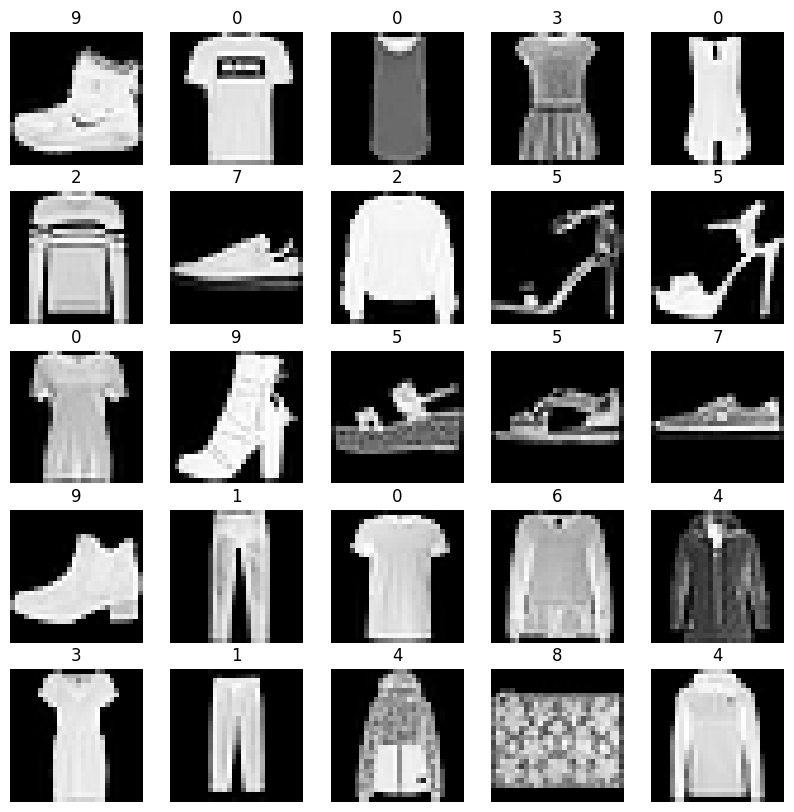

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='Greys_r')
    plt.title(train_labels[i])
    plt.axis('off')
    
plt.show()

## Normalizing and flattening all images in the dataset:

In [ ]:
train_images = train_images.reshape((60000, -1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, -1))
test_images = test_images.astype('float32') / 255

In [ ]:
# summarize the shape of the dataset
print('Train', train_images.shape, train_labels.shape)
print('Test', test_images.shape, test_labels.shape)

Train (60000, 784) (60000,)
Test (10000, 784) (10000,)


## Building the model:

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

encoding_dim = 32   # dimension of the latent representation
image_size = train_images.shape[1]

# Create input layer. This returns a tensor
inputs = layers.Input(shape=(image_size,), name = 'input_image')

# Create 3 hidden layers
encoded_layer = layers.Dense(encoding_dim,
                       activation='relu',
                       name = 'encoded')(inputs) 
                       ## The output of this layer represents the encoding vector


  

# Create output layer
output_image = layers.Dense(image_size, # Why?
                            activation='sigmoid',
                            name = 'reconstructed')(encoded_layer)

# Create model
model = Model(inputs=inputs, outputs=output_image)


In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 784)]             0         
                                                                 
 encoded (Dense)             (None, 32)                25120     
                                                                 
 reconstructed (Dense)       (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

model.fit(train_images,
          train_images, # train_images are both the inputs and the labels
          epochs=10,
          batch_size=64)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0363
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0174
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0146
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0137
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0133
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0131
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0129
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0128
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0127
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0127


1/1 [==============================] - 0s 50ms/step


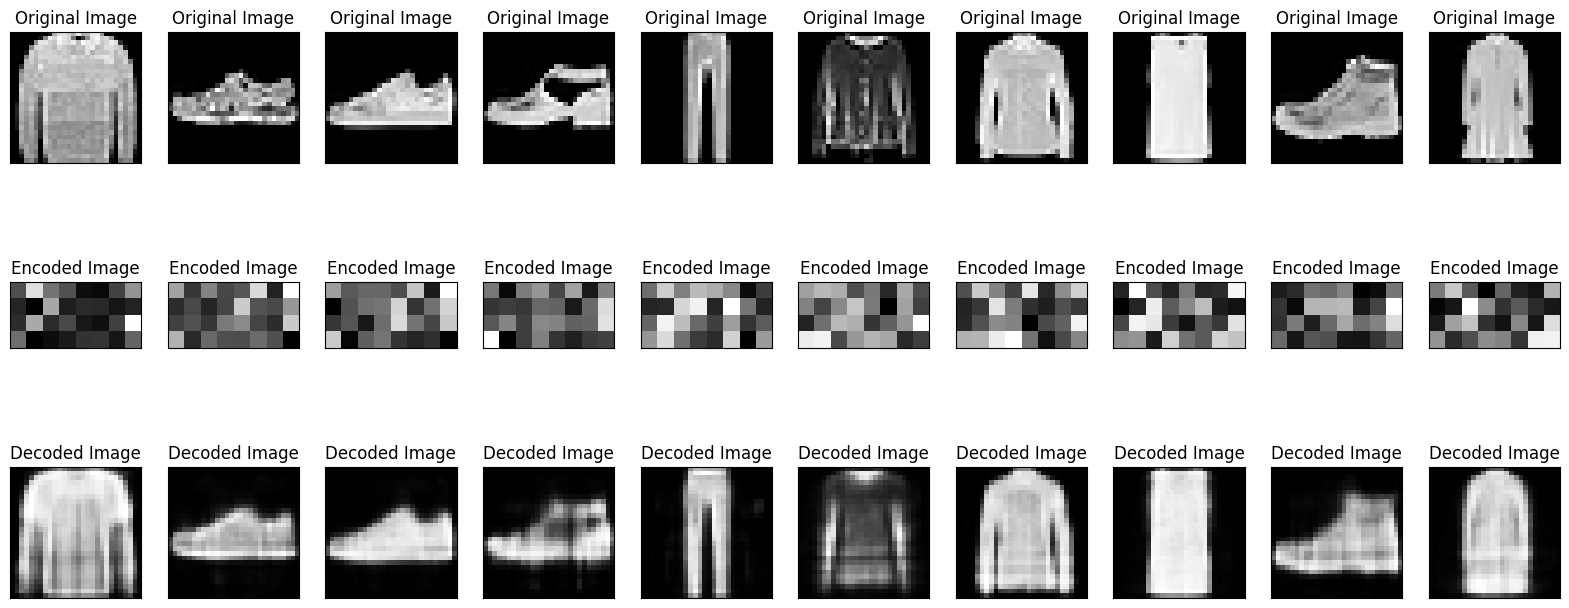

In [ ]:
# Get first few samples of test images
in_imgs = test_images[20:30]

# Get model's reconstructions
reconstructed = model.predict(in_imgs)

# Get output of hidden layer
get_encoded_output = Model(inputs=model.input, outputs=model.get_layer('encoded').output)
encoded_imgs = get_encoded_output.predict(in_imgs)


# Plot the original images, encoded images, and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 8))

for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(in_imgs[i].reshape(28, 28))
    plt.gray()
    plt.title('Original Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 8))
    plt.gray()
    plt.title('Encoded Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + n*2)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    plt.title('Decoded Image')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
